<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Ignacio Meza, Gabriel Iturra
- Auxiliar: Sebastián Tinoco
- Ayudante: Arturo Lazcano, Angelo Muñoz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Tomás Aguirre
- Nombre de alumno 2: Ignacio Albornoz


### **Link de repositorio de GitHub:** `https://github.com/tomasaguirre-ignacioalbornoz/MDS7202`

### Indice 

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes_data.csv')
df.head(4)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0


## 2. Clasificación de pacientes con diabetes (0.5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento tome en cuenta **todos** los pasos necesarios para entrenar un modelo de aprendizaje supervisado vistos hasta la fecha (use `Pipeline`, `ColumnTransformer`, etc.), comente sus decisiones y los resultados obtenidos con el modelo. ¿Es acaso un buen predictor de diabetes?, ¿Qué buscan explicar las métricas utilizadas?, ¿las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?. 

In [2]:
!pip install xgboost
!pip install sklearn-pandas
!pip install matplotlib


In [3]:
df.dtypes

Age                     float64
Sex                     float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Stroke                  float64
HighBP                  float64
Diabetes                float64
dtype: object

In [4]:
df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


En primer lugar se ve como es la distribución de los datos. De donde se puede ver que todas corresponden a variables numéricas. Cabe destacar que muchas de las columnas ya se encuentran entre 0 y 1, por lo que se aplicará un escalamiento solamente a aquellas columnas que no se encuentran en este intervalo.

Por otro lado, se nota que la columna que indica la edad de las personas va desde 1 a 13.

In [5]:
# Se revisa que no hayan datos nulos en el df
df.isna().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [6]:
# Se identifican filas duplicadas en el dataset
df.duplicated().sum()

6672

In [7]:
# Se eliminan los datos duplicados
df.drop_duplicates(inplace=True)

In [8]:
# Se cuentan las variables de cada clase
df['Diabetes'].value_counts()

Diabetes
1.0    33398
0.0    30622
Name: count, dtype: int64

In [9]:
df.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn_pandas import DataFrameMapper


def get_feature_names(column_transformer, input_features):
    """Get feature names from a ColumnTransformer."""
    output_features = []

    for name, transformer, features in column_transformer.transformers_:
        if name != 'remainder':
            if hasattr(transformer, 'get_feature_names_out'):
                feature_names = transformer.get_feature_names_out(features)
                output_features.extend(feature_names)
            else:
                output_features.extend(features)
        else:
            remainder_features = [f for f in input_features if f not in output_features]
            output_features.extend(remainder_features)

    return output_features

# Identificar las columnas que están fuera del rango [0, 1]
columns_to_scale = df.columns[(df.min() < 0) | (df.max() > 1)].tolist()

# Definir el transformer
numeric_transformer = DataFrameMapper(
    [([col], MinMaxScaler()) for col in columns_to_scale], 
    input_df=True, df_out=True
)


# Definir el column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, columns_to_scale)
    ],
    remainder='passthrough' 
)


In [11]:
from sklearn.model_selection import train_test_split

X = df.drop('Diabetes', axis = 1)
y = df['Diabetes']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=314159)

In [12]:
from xgboost import XGBClassifier

# Definir el modelo XGBoost
xgb_model = XGBClassifier()

# Crear el pipeline con preprocesamiento y modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# After fitting your pipeline, call this function
processed_feature_names = get_feature_names(pipeline.named_steps['preprocessor'], df.columns)
print("Features after preprocessing:", processed_feature_names)

# Hacer predicciones en el conjunto de validación
y_pred = pipeline.predict(X_val)

Features after preprocessing: ['Age', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Sex', 'HighChol', 'CholCheck', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'DiffWalk', 'Stroke', 'HighBP', 'Diabetes']


In [13]:
from sklearn.metrics import classification_report

# Calcular y mostrar el informe de clasificación
class_report = classification_report(y_val, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.66      0.70      6118
         1.0       0.72      0.80      0.76      6686

    accuracy                           0.73     12804
   macro avg       0.74      0.73      0.73     12804
weighted avg       0.73      0.73      0.73     12804



El modelo entrenado no es un buen predictor de diabetes, pues al ser una condición importante para la salud de las personas, el predictor no puede fallar en los falsos negativos ni en los falsos positivos si es que se quiere utilizar solamente el predictor para la detección de la condición. En este sentido, al ver el recall, donde se obtienen valores de 0.63 y 0.78 para las clases 0 y 1 respectivamente, se puede ver que estos valores no son suficientes si lo que se quiere hacer es obtener la mayor tasa de verdaderos positivos.

Por otro lado, estas métricas permiten notar cómo se comporta el modelo sobre los datos de validación, pero no entregan información sobre cómo el algoritmo podría estar eligiendo de buena manera las características.

## 3. Importancia de las features con XGBoost (0.5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?

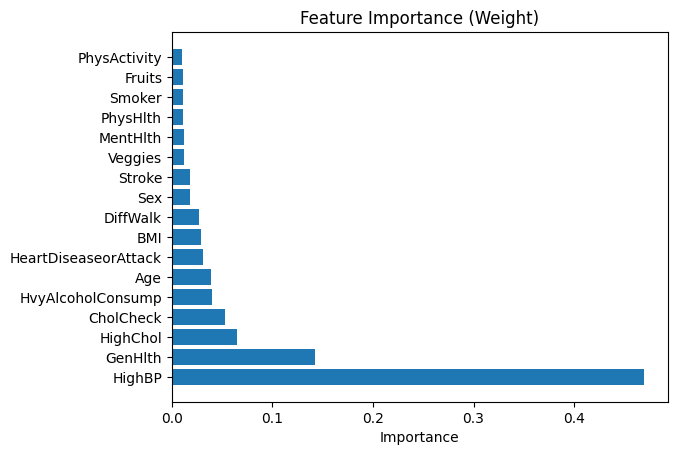

In [14]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Obtener el modelo XGBoost del pipeline
xgb_model = pipeline.named_steps['classifier']

# Obtener la importancia de características
importances_weight = xgb_model.feature_importances_

# Obtener los nombres de las características después del preprocesamiento
processed_feature_names = get_feature_names(pipeline.named_steps['preprocessor'], df.columns)

# Crear un diccionario que asocie los nombres de características con sus importancias
feature_importance_dict = dict(zip(processed_feature_names, importances_weight))

# Ordenar el diccionario por importancia descendente
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Extraer los nombres y las importancias ordenadas
sorted_feature_names, sorted_importances = zip(*sorted_feature_importance)


top_features = 17
plt.barh(range(top_features), sorted_importances[:top_features], align="center")
plt.yticks(range(top_features), sorted_feature_names[:top_features])
plt.xlabel('Importance')
plt.title('Feature Importance (Weight)')
plt.show()

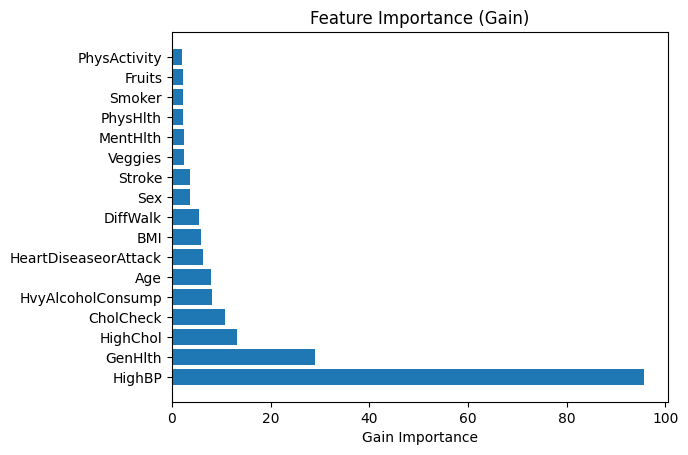

In [15]:
# Obtener el modelo XGBoost del pipeline
xgb_model = pipeline.named_steps['classifier']

# Obtener la importancia de características
importances_gain = xgb_model.get_booster().get_score(importance_type='gain')

# Obtener los nombres de las características después del preprocesamiento
processed_feature_names = get_feature_names(pipeline.named_steps['preprocessor'], df.columns)

# Crear un diccionario que asocie los nombres de características con sus importancias
feature_importance_dict_gain = {processed_feature_names[int(k[1:])]: v for k, v in importances_gain.items()}

# Ordenar el diccionario por importancia descendente
sorted_feature_importance_gain = sorted(feature_importance_dict_gain.items(), key=lambda x: x[1], reverse=True)

# Extraer los nombres y las importancias ordenadas
sorted_feature_names_gain, sorted_importances_gain = zip(*sorted_feature_importance_gain)

# Tomar solo las primeras n características para visualizar
top_features_gain = 17  # ajusta según tus necesidades
plt.barh(range(top_features_gain), sorted_importances_gain[:top_features_gain], align="center")
plt.yticks(range(top_features_gain), sorted_feature_names_gain[:top_features_gain])
plt.xlabel('Gain Importance')
plt.title('Feature Importance (Gain)')
plt.show()

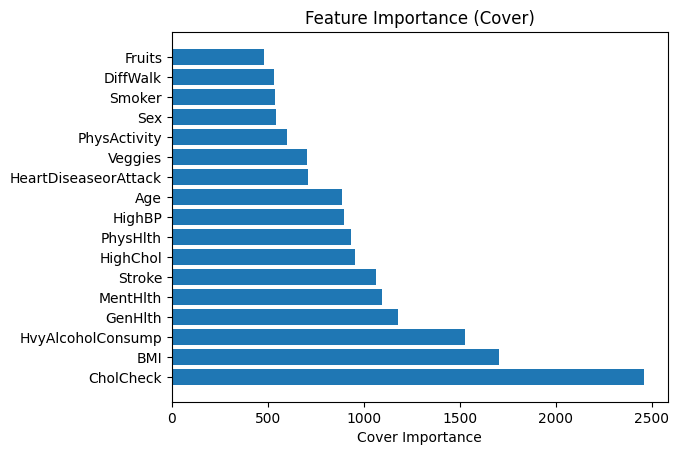

In [16]:
# Obtener el modelo XGBoost del pipeline
xgb_model = pipeline.named_steps['classifier']

# Obtener la importancia de características
importances_gain = xgb_model.get_booster().get_score(importance_type='cover')

# Obtener los nombres de las características después del preprocesamiento
processed_feature_names = get_feature_names(pipeline.named_steps['preprocessor'], df.columns)

# Crear un diccionario que asocie los nombres de características con sus importancias
feature_importance_dict_gain = {processed_feature_names[int(k[1:])]: v for k, v in importances_gain.items()}

# Ordenar el diccionario por importancia descendente
sorted_feature_importance_gain = sorted(feature_importance_dict_gain.items(), key=lambda x: x[1], reverse=True)

# Extraer los nombres y las importancias ordenadas
sorted_feature_names_gain, sorted_importances_gain = zip(*sorted_feature_importance_gain)

# Tomar solo las primeras n características para visualizar
top_features_gain = 17  # ajusta según tus necesidades
plt.barh(range(top_features_gain), sorted_importances_gain[:top_features_gain], align="center")
plt.yticks(range(top_features_gain), sorted_feature_names_gain[:top_features_gain])
plt.xlabel('Cover Importance')
plt.title('Feature Importance (Cover)')
plt.show()

Las importancias obtenidas no son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles, pues esta importancia se calcula en función de cuántas veces fue utilizada una variable para dividir un nodo del árbol en cuestión. Esto es una debilidad porque en los modelos donde hay muchas variables sobre las que se puede elegir, puede ocurrir que el modelo ocupe una variable en particular, pero no necesariamente por su importancia, sino, porque existen más oportunidades para dividirla.

## 4. Métodos Agnósticos Globales (1.0 puntos)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. Visualice los resultados de este método en un gráfico. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala está?). Además, responda las siguientes preguntas:


- ¿Cómo mide la importancia de las features su propuesta?
- ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿Tienen sentido?
- ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?
- Nombre y explique 3 ventajas y 3 desventajas del método implementado.

Accuracy con el modelo original: 0.7648


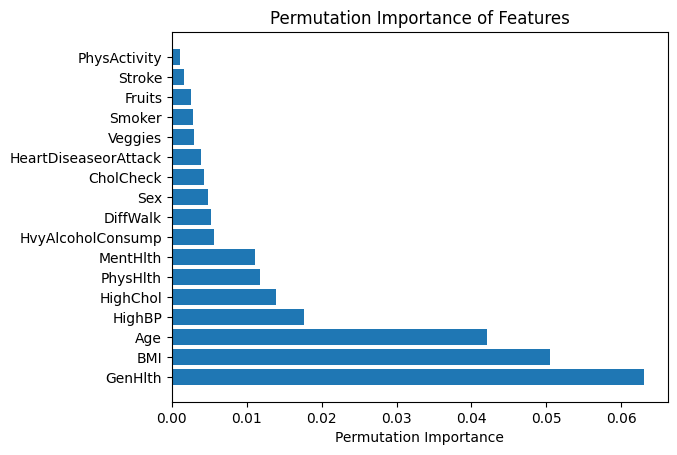

In [17]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Supongamos que ya tienes tu pipeline entrenado y se llama 'pipeline'
# Además, asegúrate de que 'pipeline' incluya tanto el preprocesamiento como el modelo entrenado.

# Obtener el conjunto de datos original
X_original = df.drop('Diabetes', axis=1)  # Suponiendo que 'Diabetes' es la variable objetivo
y_original = df['Diabetes']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_original, y_original, test_size=0.2, random_state=42)

# Obtener las predicciones con el modelo original
y_pred_original = pipeline.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
print(f'Accuracy con el modelo original: {accuracy_original:.4f}')

# Inicializar una lista para almacenar las importancias de características permutadas
permutation_importances = []

# Número de permutaciones para realizar
n_permutations = 30  # Ajusta según tus necesidades

# Iterar sobre cada característica y realizar permutaciones
for feature in X_train.columns:
    # Copiar el conjunto de datos original para mantenerlo sin cambios
    X_permuted = X_train.copy()

    # Inicializar una lista para almacenar las importancias de la característica permutada
    importances_permuted = []

    # Iterar sobre el número de permutaciones
    for _ in range(n_permutations):
        # Permutar aleatoriamente los valores de la característica actual
        X_permuted[feature] = np.random.permutation(X_permuted[feature])

        # Obtener las predicciones con el modelo después de la permutación
        y_pred_permuted = pipeline.predict(X_permuted)

        # Calcular la métrica de interés (puedes usar otras métricas según tus necesidades)
        accuracy_permuted = accuracy_score(y_train, y_pred_permuted)

        # Calcular la importancia de la característica permutada y almacenarla
        feature_importance_permuted = accuracy_original - accuracy_permuted
        importances_permuted.append(feature_importance_permuted)

    # Calcular la importancia promedio para la característica
    average_importance_permuted = np.mean(importances_permuted)

    # Almacenar la importancia promedio de la característica permutada
    permutation_importances.append((feature, average_importance_permuted))

# Ordenar las importancias de características permutadas
permutation_importances.sort(key=lambda x: x[1], reverse=True)

# Extraer los nombres y las importancias ordenadas
sorted_feature_names_permuted, sorted_importances_permuted = zip(*permutation_importances)

# Visualizar las importancias de características permutadas en un gráfico de barras
plt.barh(range(len(permutation_importances)), sorted_importances_permuted, align="center")
plt.yticks(range(len(permutation_importances)), sorted_feature_names_permuted)
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance of Features')
plt.show()


1. La importancia de las features según la propuesta se mide calculando primeramente el accuracy de los datos originales, para posteriormente, por cada columna presente en el dataset, permutar sus datos sobre esa misma columna. De esta manera, con los datos permutados sobre si mismos aleatoriamente, se calcula nuevamente el accuracy sobre este dataset "permutado". Luego el accuracy obtenido se compara con el accuracy de los datos originales. En función del impacto que tiene esta permutación sobre la métrica se define la importancia de la feature.
2. Las features con mayor impacto son:
   1. GenHlth
   2. BMI
   3. Age
   4. HighBP
   5. HighChol
   
   Los resultados de las variables más importantes para el modelo según permutación sí tienen sentido según los conocimientos generales que se tienen de diabetes, pues esta se presenta con mayor probabilidad en personas con mala salud en general (GenHlth, BMI), además tiende a aumentar la probabilidad de aparición junto con el aumento de la edad, y ademasse correlaciona indirectamente con niveles altos de presión en la sangre y colesterol. 
3. Con respecto al método anterior, donde se le atribuía la mayor importancia a niveles altos de presión sanguínea en dos de los tres métedos, es posible decir que no se encuentran en completo acuerdo con el método de la permutación, pues este último no le asigna un valor  sobresaliente a esta variable, además de tampoco concordar en las 5 variables más importantes.
4. - Ventajas:
   1. Es un enfoque no paramétrico que no necesita supuestos sobre la distribución de los datos.
   2. Es robusto para identificar la importancia de las características a pesar de que existan no linealidades o interacción entre variables dentro de los datos.
   3. Es aplicable a diferentes modelos sin importar su complejidad.
   - Desventajas:
   1. Alto costo computacional: debido al número de permutaciones y a la cantidad de datos, este método resulta muy costoso computacionalmente. Mientras más permutaciones, más tarda en ejecutarse.
   2. Es dependiente de la métrica utilizada. Esto es, que la importancia de las características puede variar en función de la métrica utilizada.
   3. Es sensible al tamaño de los datos. En conjuntos de datos que son pequeños puede no capturar la variabilidad de los datos completamente, lo que conduce a estimaciones menos precisas de la importancia de las características.

## 5. Métodos Agnósticos Locales (2.0 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/1-27-2017/fBrzT8.mp4" width="400">
</p>

### 5.1 Calculando Shap Values (0.4 puntos)

Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. ¿Qué representa cada número en su resultado? ¿Es posible atribuir un significado a la positividad/negatividad de cada valor?

In [18]:
!pip install shap

In [19]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

[22:03:29] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


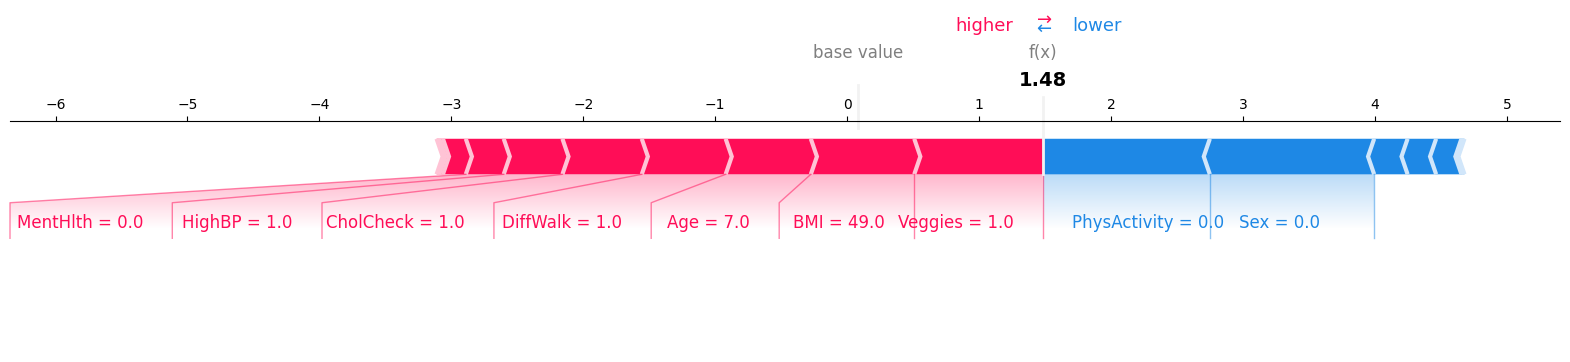

In [20]:
import shap

# Extraer el modelo real del pipeline
model = pipeline.named_steps['classifier']

# Crear un explainer SHAP con el modelo y los datos de prueba
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)

# Elegir una instancia específica (por ejemplo, la primera)
instance_index = 1

# Obtener los valores SHAP para la instancia seleccionada
shap_values_instance = shap_values[instance_index]

# Obtener el valor esperado (baseline) del modelo
expected_value = explainer.expected_value

# Crear un gráfico de aporte individual para la instancia
shap.force_plot(expected_value, shap_values_instance, X_test.iloc[instance_index], feature_names=X_test.columns, matplotlib=True)


En este resultado se puede ver que en primer lugar están distribuidas las variables del dataset en el eje x. Más en específico, se caracteriza al paciente en cuestión. Junto con esto, se puede ver cuánto aporta cada variable y su valor la decisión del modelo para clasificarlo como sin o con diabetes.
En este sentido, es posible ver que todas las variables en rojo aportan a que el valor de f(x) aumente, siendo las más amplias las que tienen un mayor impacto en este valor, mientras que las variables en azul son las que hacen que f(x) disminuya su valor en forma opuesta a lo recién explicado.

### 5.2 Aporte local (0.4 puntos)

Usando los *shap values* calculados, grafique el **aporte** de las diferentes variables para las instancias **1**, **9** y **150**, interprete sus resultados y responda:
- ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? 
- ¿Existe algún patrón común entre las instancias analizadas? 
- ¿Es posible generalizar estas conclusiones a todo el dataset?

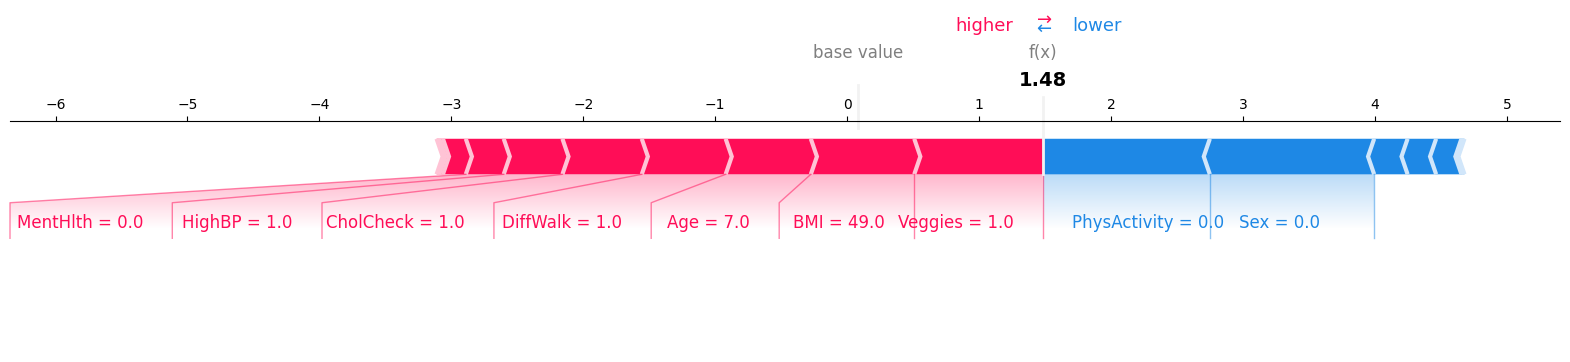

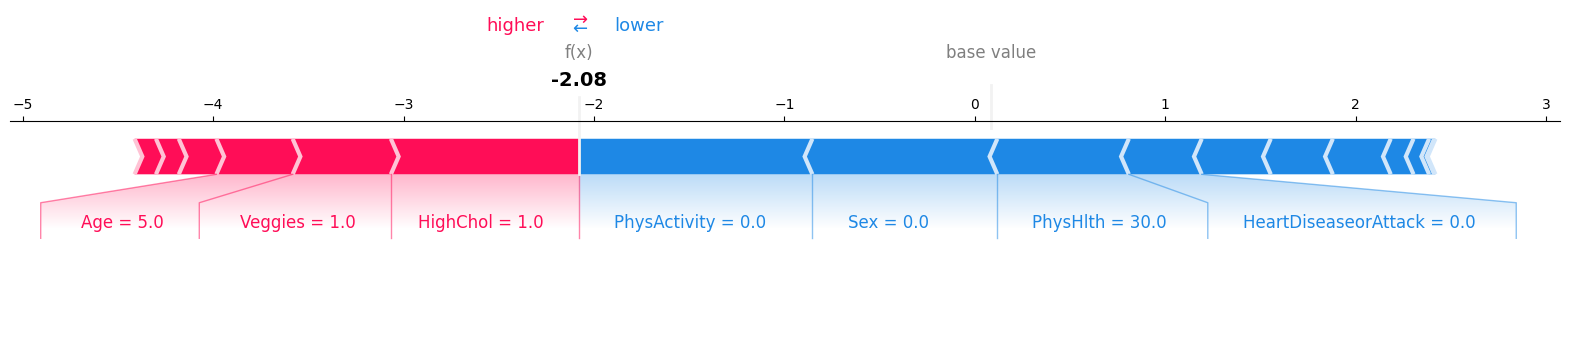

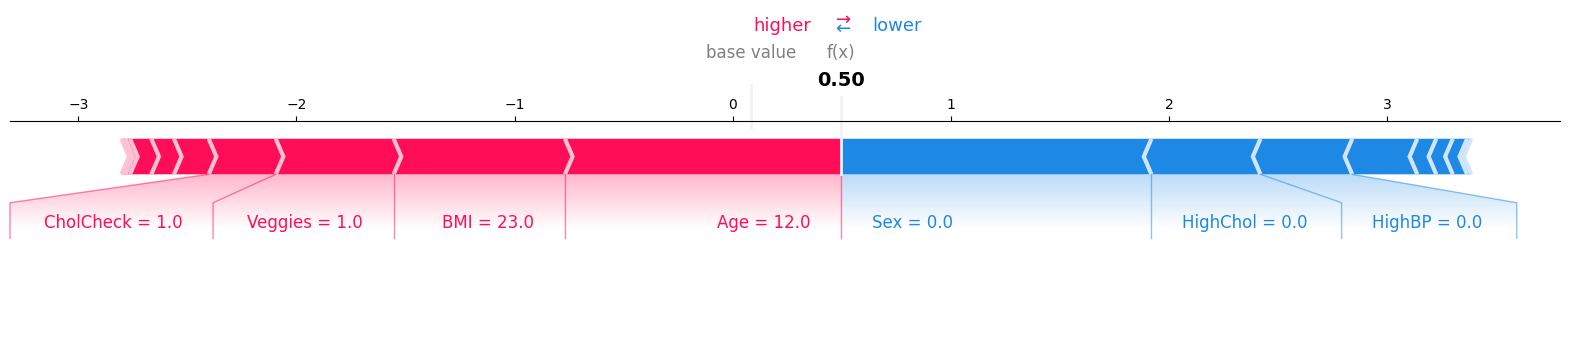

In [21]:
# Elegir instancias específicas (por ejemplo, 1, 9 y 150)
instances_indices = [1, 9, 150]

# Crear gráficos de aporte para las instancias seleccionadas
for index in instances_indices:
    # Obtener los valores SHAP para la instancia seleccionada
    shap_values_instance = shap_values[index]

    # Obtener el valor esperado (baseline) del modelo
    expected_value = explainer.expected_value

    # Inicializar el entorno de SHAP (es necesario para algunos entornos)
    shap.initjs()

    # Crear un gráfico de aporte individual para la instancia
    shap.force_plot(expected_value, shap_values_instance, X_test.iloc[index], feature_names=X_test.columns, matplotlib=True)

Aparentemente, aquellos pacientes que tienen la variables Veggies = 1 son aquellos pacientes que, según el modelo, tienen una mayor probabilidad de padecer diabetes. Esta es la única variable que se repite en los tres casos, ya que si bien la edad también aporta en todos los casos, sus valores son distintos en los tres casos. Por otro lado, la variable CholCheck, que se repite en los casos 1 y 150, también indica una probabilidad positiva a padecer la enfermedad.

A pesar de que veggies se repita en los tres casos, esto podría ser una coincidencia, por lo que no sería correcto generalizar para todos los datos que la variable veggies sea relevante, y menos los demás patrones mencionados anteriormente. Sin embargo, estos nos podrían dar un indicio de lo que se podría dar para el dataset completo.

### 5.3 Aporte global (0.4 puntos)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

[22:03:33] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


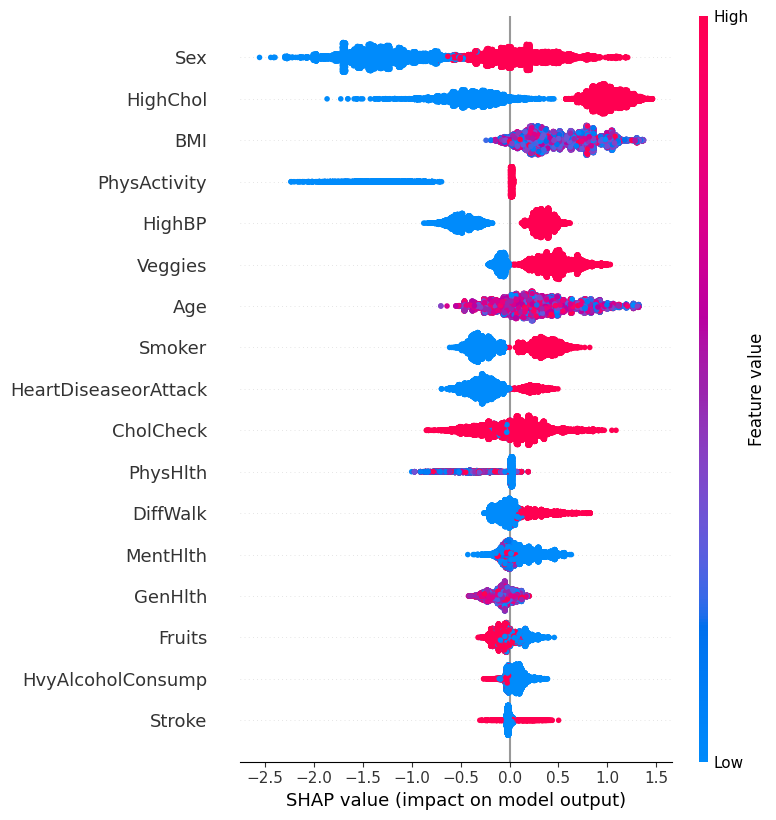

In [22]:
# Extraer el modelo real del pipeline
model = pipeline.named_steps['classifier']

# Crear un explainer SHAP con el modelo y los datos de prueba
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)

# Obtener el valor esperado (baseline) del modelo
expected_value = explainer.expected_value

# Crear un resumen de los valores SHAP para todas las instancias
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

A partir del nuevo gráfico obtenido, es posible notar que efectivamente la variable Veggies presenta una tendencia positiva al aumentar su valor. Con respecto a la variable CholCheck no se ve una tendencia clara.

Ahora, viendo los resultados generales, se ve que de acuerdo con el modelo, el Sexo es la variable más importante, donde para los valores 1 se nota que existe una mayor tendencia a aumentar su probabilidad de padecer diabetes.
Del mismo modo, la variable HighChol también presenta una tendencia positiva a la enfermedad al aumentar su valor.

### 5.4 Scatter plot (0.4 puntos)

Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

[22:03:37] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


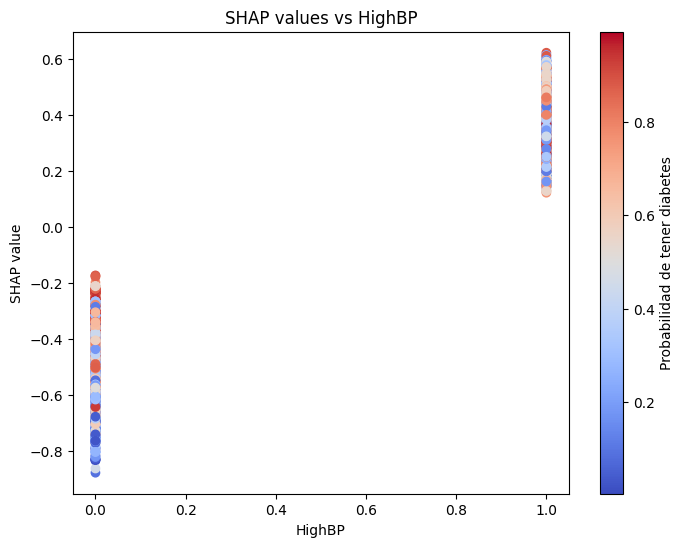

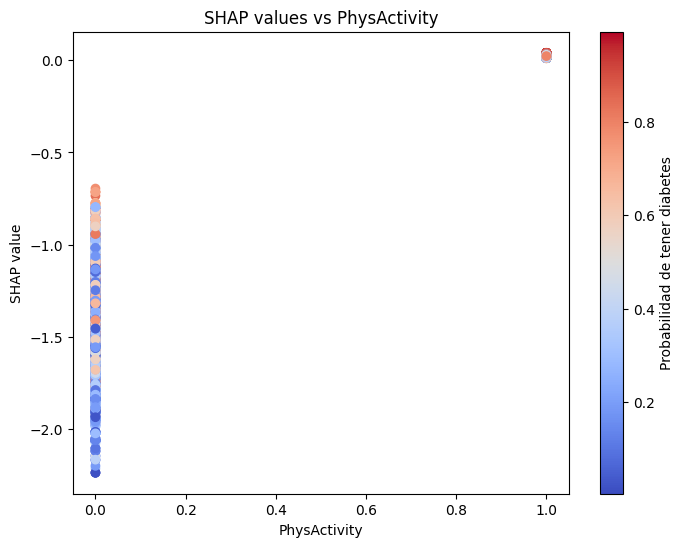

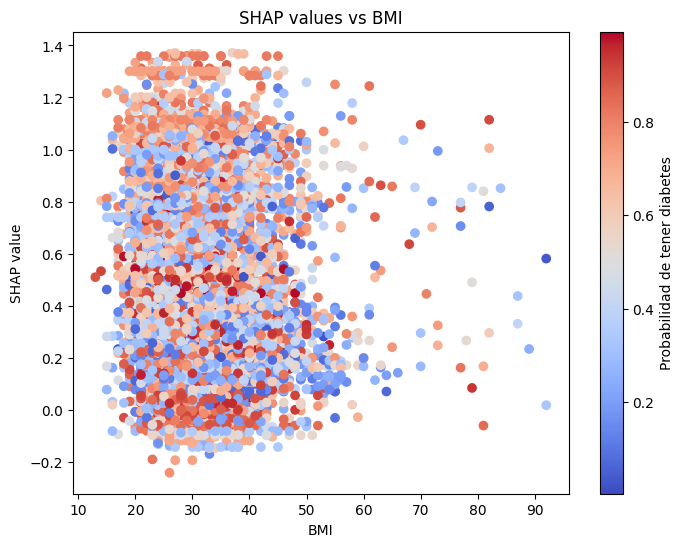

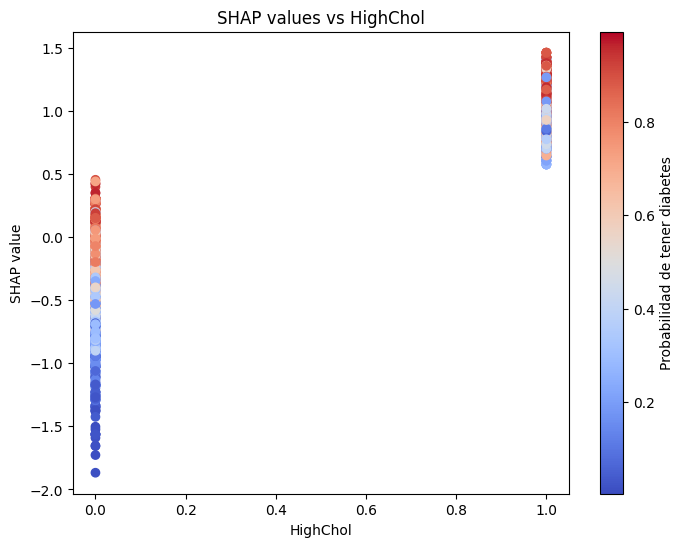

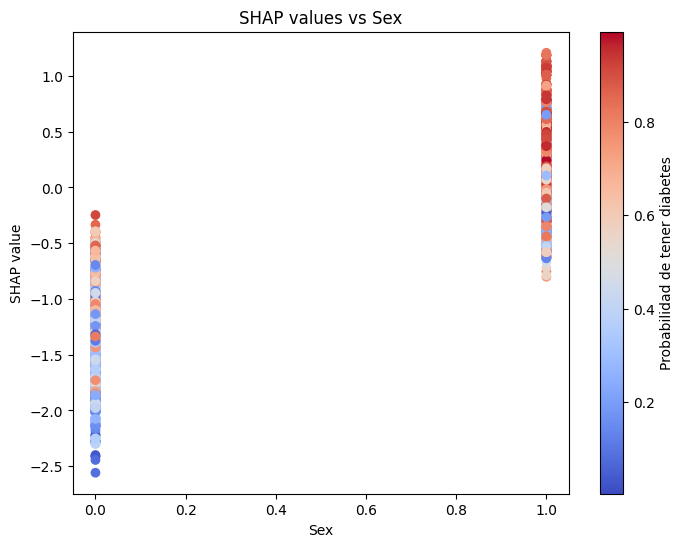

In [23]:
# Extraer el modelo real del pipeline
model = pipeline.named_steps['classifier']

# Crear un explainer SHAP con el modelo y los datos de prueba
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)

# Obtener las predicciones de probabilidad para cada instancia en los datos de prueba
y_pred_proba = model.predict_proba(X_test)[:,1]

# Identificar las 5 features más importantes
important_features = np.argsort(np.abs(shap_values).mean(0))[-5:]

# Crear scatter plots para cada una de las 5 features más importantes
for feature in important_features:
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test.iloc[:, feature], shap_values[:, feature], c=y_pred_proba, cmap='coolwarm')
    plt.colorbar(label='Probabilidad de tener diabetes')
    plt.xlabel(X_test.columns[feature])
    plt.ylabel('SHAP value')
    plt.title(f'SHAP values vs {X_test.columns[feature]}')
    plt.show()


Los gráficos proporcionados ilustran la relación entre los valores SHAP (que representan el impacto de cada característica en la predicción del modelo) y los valores de cinco características diferentes (HighBP, PhysActivity, BMI, HighChol, y Sex), con el color que indica la probabilidad de tener diabetes.

A partir de estos gráficos, podemos inferir lo siguiente:

HighBP (Presión Arterial Alta): Hay una concentración de valores SHAP altos cuando HighBP es alto, lo que indica que una presión arterial alta tiende a aumentar la probabilidad de que el modelo prediga diabetes. El gradiente de color muestra que esta tendencia es más fuerte (es decir, más roja) a medida que la probabilidad de diabetes aumenta.

PhysActivity (Actividad Física): La actividad física parece tener un efecto negativo en la predicción de la diabetes (valores SHAP negativos), lo que significa que a mayor actividad física, menor es la probabilidad de que el modelo prediga diabetes. El gradiente de color se inclina hacia el azul, lo que sugiere que los valores más altos de actividad física están asociados con una menor probabilidad de diabetes.

BMI (Índice de Masa Corporal): Se observa una dispersión más amplia en los valores SHAP en relación con el BMI. A medida que el BMI aumenta, también lo hace la variabilidad en los valores SHAP, lo que indica que el BMI es un fuerte predictor de diabetes. Los puntos con un BMI más alto tienden a tener una mayor probabilidad de diabetes (colores más cálidos).

HighChol (Colesterol Alto): Los valores SHAP muestran una distribución similar a la de HighBP, con valores más altos de SHAP asociados con niveles más altos de colesterol. Sin embargo, la relación parece ser menos pronunciada que con la presión arterial alta, lo que sugiere que el colesterol alto es importante, pero tal vez no tan crítico como la presión arterial alta para la predicción de la diabetes.

Sex (Sexo): La característica Sexo muestra una distribución que no parece tener un patrón claro en relación con los valores SHAP, lo que sugiere que el sexo por sí solo no es un predictor tan fuerte de la diabetes en el modelo, o que su efecto es más sutil y posiblemente interactúa con otras características.

Estos resultados sugieren que la presión arterial alta y el BMI son predictores significativos de la diabetes en el modelo, con un aumento en estos valores que generalmente aumenta la probabilidad de una predicción de diabetes. Por otro lado, la actividad física parece ser un predictor negativo, lo que significa que a mayor actividad física, menor es la probabilidad de diabetes. El colesterol alto también es un predictor significativo, aunque su relación parece ser menos directa que la de la presión arterial alta. El sexo no parece ser un predictor fuerte por sí mismo según los valores SHAP.

### 5.5 Partial Dependence Plot (0.4 puntos)

Finalmente, se le pide generar un gráfico del tipo **Partial Dependence Plot** para las mismas 5 variables con mayor impacto global usando una submuestra de **1000 observaciones**. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.


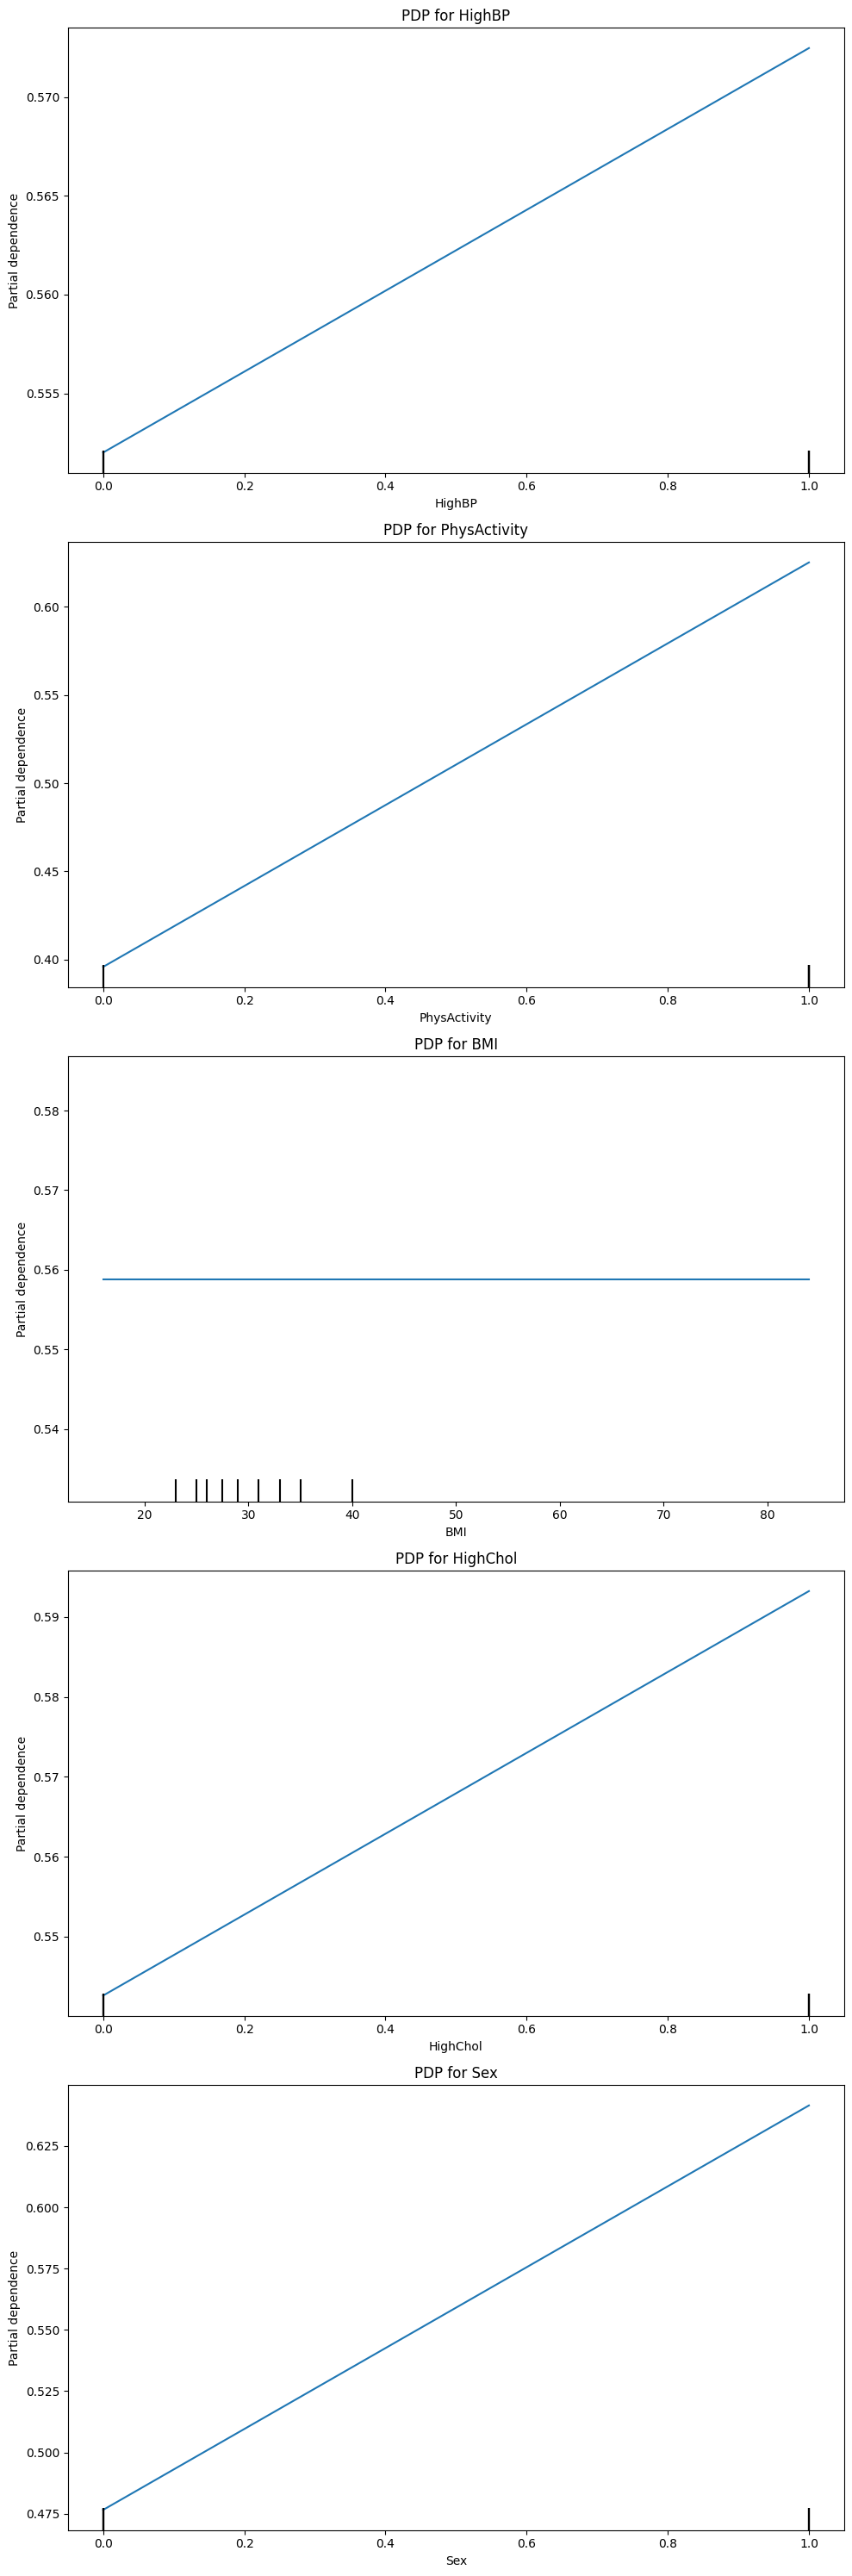

In [24]:
from sklearn.inspection import PartialDependenceDisplay

# Tomar una submuestra aleatoria de 1000 observaciones de X_test
subsample = X.sample(1000, random_state=0)

# Inicializar la figura para múltiples plots
fig, axs = plt.subplots(5, 1, figsize=(10, 30))

# Generar los Partial Dependence Plots para cada una de las 5 características importantes
for i, feature in enumerate(important_features):
    PartialDependenceDisplay.from_estimator(model, subsample, features=[feature], 
                                            feature_names=subsample.columns, ax=axs[i])
    axs[i].set_title(f'PDP for {subsample.columns[feature]}')
    axs[i].set_xlabel(subsample.columns[feature])
    axs[i].set_ylabel('Average model output')

plt.tight_layout()
plt.show()


Los gráficos de Partial Dependence Plot (PDP) muestran cómo varía la salida promedio del modelo de clasificación en relación con los valores de cada una de las cinco características principales (HighBP, PhysActivity, BMI, HighChol, y Sex).

Estos gráficos se pueden intrerpretar de la siguiente manera:

HighBP: La salida promedio del modelo aumenta a medida que aumenta HighBP. Esto sugiere que una mayor presión arterial está asociada con una mayor probabilidad de predecir diabetes, lo que es consistente con la literatura médica que relaciona la hipertensión con un mayor riesgo de diabetes.

PhysActivity: Similar al caso de HighBP, la salida promedio del modelo aumenta con la actividad física. Esto es inesperado, ya que típicamente esperaríamos ver una relación negativa; es decir, a mayor actividad física, menor probabilidad de predecir diabetes. Este resultado podría deberse a una interacción con otras variables o a una particularidad de la submuestra.

BMI: Hay un aumento leve en la salida promedio del modelo a medida que aumenta el BMI, lo que sugiere que un mayor BMI puede estar asociado con una mayor probabilidad de diabetes. Sin embargo, la relación no parece ser tan fuerte como con HighBP.

HighChol: La tendencia es similar a la de HighBP, donde un mayor nivel de colesterol parece estar relacionado con una mayor salida promedio del modelo, lo que indicaría una mayor probabilidad de diabetes.

Sex: La salida promedio del modelo aumenta con la característica Sex. Podría sugerir que uno de los géneros tiene una mayor probabilidad de predecir diabetes en el modelo.

Para evaluar si estas conclusiones son generalizables a todo el conjunto de datos, sería importante revisar si la submuestra de 1000 observaciones es representativa del conjunto de datos completo. Si la submuestra está sesgada de alguna manera, entonces las conclusiones podrían no ser generalizables. Además, sería útil realizar esta misma evaluación en diferentes submuestras o en el conjunto de datos completo para confirmar la consistencia de los resultados.

En el caso de PhysActivity, particularmente, donde el resultado es contrario a lo esperado, sería especialmente crítico revisar los datos y considerar la posibilidad de confusión estadística o interacciones con otras variables que no se aprecian en el PDP.

## 6. Sistema de Reglas! (1.0 puntos)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo. En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

In [25]:
!pip install alibi
!pip install alibi[ray]
!pip install -U ipywidgets

In [26]:
from alibi.explainers import AnchorTabular

In [43]:
explainer = AnchorTabular(predictor=model.predict, feature_names=X_test.columns.tolist())

explainer.fit(X_train.values, disc_perc=[25, 50, 75])

def explain_and_show_rules(idx, myx):
    explanation = explainer.explain(myx.iloc[idx].values.reshape(1, -1))
    print(f"Rules for observation {idx}:")
    print(' AND '.join(explanation.anchor))
    print(f"Coverage: {explanation.coverage:.2f}, Precision: {explanation.precision:.2f}")
    return explanation

idx = 1000
# explicar predicción idx 1000
explanation_1000 = explain_and_show_rules(idx, X_test)

idx = 3001
# explicar predicción idx 3001
explanation_3001 = explain_and_show_rules(idx, X_test)

idx = 5751
# explicar predicción idx 5751
explanation_5751 = explain_and_show_rules(idx, X_test)


Rules for observation 1000:
PhysActivity <= 0.00 AND Sex <= 0.00 AND Fruits > 0.00 AND DiffWalk > 0.00 AND HighChol > 0.00
Coverage: 0.03, Precision: 0.97
Rules for observation 3001:
PhysActivity <= 0.00 AND Smoker <= 0.00 AND Fruits > 0.00
Coverage: 0.08, Precision: 0.96
Rules for observation 5751:
PhysActivity <= 0.00 AND Smoker <= 0.00 AND Age <= 7.00
Coverage: 0.04, Precision: 0.97


La aplicación del AnchorTabular en el modelo de clasificación de diabetes desarrollado por el Dr. Simi ha generado reglas específicas para las observaciones 1000, 3001 y 5751, con alta precisión pero cobertura limitada. Estas reglas reflejan el impacto de ciertas características sobre la probabilidad de tener diabetes en cada caso particular.

- Desglose de características:

Observación 1000:

Baja Actividad Física: La asociación de la baja actividad física con un mayor riesgo de diabetes es consistente con el entendimiento médico general. La actividad física regular ayuda a controlar el peso y mejora la sensibilidad a la insulina, ambos factores importantes en la prevención de la diabetes tipo 2.

Sexo: Podría indicar una mayor prevalencia de diabetes en uno de los géneros. Sin embargo, la diabetes tipo 2 generalmente no se considera que tenga una fuerte predisposición de género, lo que hace que esta asociación sea menos intuitiva.

Consumo de Frutas: Un mayor consumo de frutas generalmente se considera saludable. Sin embargo, algunas frutas tienen un alto contenido de azúcares naturales, lo que podría influir en los niveles de glucosa en sangre. Aun así, esta relación no es directa ni simple.

Dificultades para Caminar: Esto puede estar relacionado con la obesidad o problemas musculoesqueléticos, ambos asociados con un mayor riesgo de diabetes tipo 2.

Alto Colesterol: El alto colesterol está vinculado a enfermedades cardiovasculares, que a menudo coexisten con la diabetes tipo 2 debido a factores de riesgo comunes como la obesidad y el estilo de vida sedentario.


Observación 3001:

Baja Actividad Física: Al igual que en la observación 1000, la baja actividad física es un factor de riesgo conocido para la diabetes.

No Ser Fumador: Esta asociación es contraintuitiva, ya que el tabaquismo generalmente aumenta el riesgo de numerosas enfermedades, incluida la diabetes tipo 2.

Consumo de Frutas: Nuevamente, esta característica es sorprendente, dado que el consumo de frutas suele considerarse parte de un estilo de vida saludable.

Observación 5751:

Baja Actividad Física: Consistente con las otras observaciones, refleja el conocimiento médico general.

No Ser Fumador: Al igual que en la observación 3001, esta relación es inesperada.

Edad Menor o Igual a 7 Años: Esta es una característica particularmente inusual en esta regla, ya que la diabetes tipo 2 es más común en adultos. Sin embargo, podría indicar un caso de diabetes tipo 1, que es más común en niños.

- Cobertura y precisión:

Para la observación 1000, aunque esta regla tiene una precisión del 97%, solo se encuentra en el 3% del conjunto de datos, indicando que es una situación bastante específica.

En el caso de la observación 3001, la regla solo cubre el 8% del conjunto de datos, lo que sugiere que estas condiciones son relativamente poco comunes entre todos los pacientes.

Para la observación 5751, la regla tiene una alta precisión del 97%, pero su cobertura es solo del 4%.

En general, mientras que las reglas generadas por AnchorTabular son altamente precisas para explicaciones locales y proporcionan insights valiosos en casos específicos, su limitada cobertura implica que no representan el comportamiento del modelo en el conjunto completo de datos. Por tanto, es crucial complementar estas explicaciones con otros métodos de interpretación y validar las reglas con conocimientos médicos, para obtener una comprensión más completa y precisa del modelo y su aplicación en la clasificación de la diabetes.

# Retrospectiva... (1.0 puntos)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?


Se han implementado varios métodos para clasificar y entender la diabetes. La tarea principal fue entrenar un modelo de XGBoost, enfocado en la clasificación de diabetes. A pesar de que el modelo no se consideró un excelente predictor debido a su rendimiento en métricas como el recall, proporcionó una base para entender la importancia de las características en la predicción de la diabetes.

El uso de métodos agnósticos globales como la importancia de las características a través de 'weight', 'cover', 'gain' en XGBoost, y el método de permutación, reveló ciertas debilidades. Específicamente, la importancia de las características basada en XGBoost no resultó suficientemente informativa para interpretar completamente el modelo debido a su enfoque en la frecuencia de uso de las características en lugar de su impacto real en la predicción. En cambio, el método de permutación, a pesar de su alto costo computacional y dependencia de la métrica, proporcionó una mejor comprensión de las características más influyentes, alineándose más estrechamente con el conocimiento general sobre la diabetes.

Para la interpretación local, se calcularon los valores SHAP, que dieron una visión detallada de cómo cada característica afecta la probabilidad de tener diabetes en casos individuales. Aunque esta técnica ofreció insights valiosos, no fue suficiente para generalizar conclusiones a todo el conjunto de datos.

El Dr. Simi también solicitó la simplificación del modelo en un sistema de reglas para explicar las decisiones a nivel de paciente. Aunque las reglas generadas para las observaciones seleccionadas fueron altamente precisas, su baja cobertura indicó que solo se encontraron aplicadas para un pequeño subconjunto de pacientes. Esto limitó su utilidad para explicaciones generales, pero proporcionó una comprensión profunda en casos específicos.

Finalmente, mientras que los métodos agnósticos globales, como la importancia de las características y los valores SHAP, ofrecieron una buena comprensión general y detallada respectivamente, sus limitaciones en términos de generalización y especificidad sugirieron la necesidad de un enfoque más equilibrado. Las reglas generadas para explicaciones locales resultaron ser útiles para entender decisiones específicas del modelo, pero su baja cobertura limitó su aplicabilidad a todo el conjunto de datos. Por lo tanto, la combinación de métodos globales y locales parece ser la estrategia más efectiva para abordar tanto la tarea de clasificación como los requisitos de interpretabilidad del Dr. Simi.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>